In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_excel('ANZ.xlsx')

In [3]:
df.head(10)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [4]:
#Checking if the availbale data is for 100 customers or not 
df['account'].nunique()

100

In [5]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

# Task 1

In [6]:
#Dropping irrelevant features 

df = df[["status","card_present_flag","balance","date",
                   "gender","age","merchant_suburb","txn_description","merchant_state","merchant_code",
                   "amount","customer_id","movement"]]
df["date"] = pd.to_datetime(df["date"])
df.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,txn_description,merchant_state,merchant_code,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,POS,QLD,NaN,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,SALES-POS,NSW,NaN,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,POS,NSW,NaN,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,SALES-POS,QLD,NaN,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,SALES-POS,QLD,NaN,3.25,CUS-2487424745,debit


In [7]:
# Total No of transaction done by each customer
df['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [8]:
# Total No of transaction done each day
df['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [9]:
#Transaction volume per day
date_tran=df.groupby('date')['amount'].sum().reset_index()

In [10]:
date_tran.head()

,date,amount
0,2018-08-01,29867.94
1,2018-08-02,21786.32
2,2018-08-03,38096.58
3,2018-08-04,6296.05
4,2018-08-05,4426.50


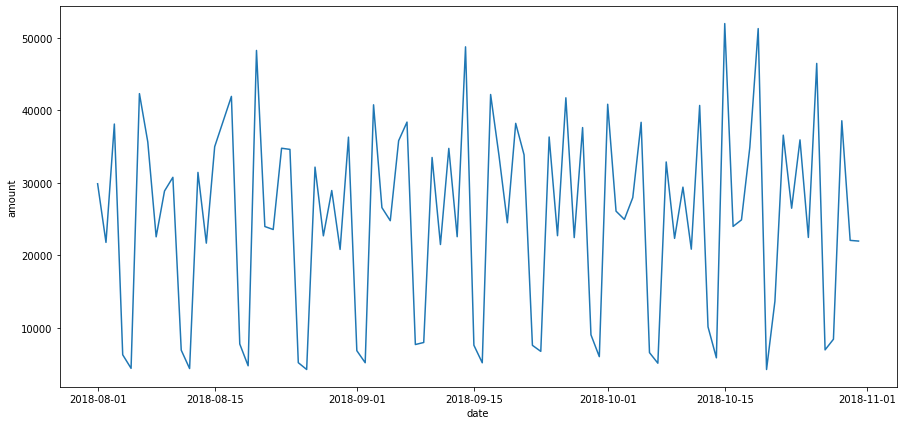

In [11]:
plt.figure(figsize=(15,7))
sns.lineplot(x='date',y='amount',data=date_tran)

In [12]:
# Total volume mean of transactions per day
date_mean=df.groupby('date')['amount'].mean().reset_index()

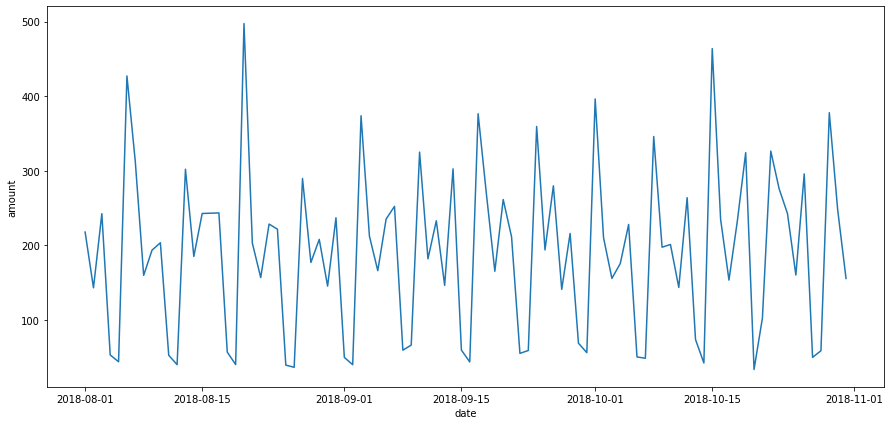

In [13]:
plt.figure(figsize=(15,7))
sns.lineplot(x='date',y='amount',data=date_mean)

In [14]:
#gender based transaction volume
gender_tran=df[['date','gender','amount']]
gender_tran.head()

,date,gender,amount
0,2018-08-01,F,16.25
1,2018-08-01,F,14.19
2,2018-08-01,M,6.42
3,2018-08-01,F,40.90
4,2018-08-01,F,3.25


In [15]:
gender_vol=gender_tran.groupby(['date','gender'])['amount'].sum().reset_index()

In [16]:
gender_vol.head()

,date,gender,amount
0,2018-08-01,F,13628.64
1,2018-08-01,M,16239.30
2,2018-08-02,F,5896.25
3,2018-08-02,M,15890.07
4,2018-08-03,F,17091.59


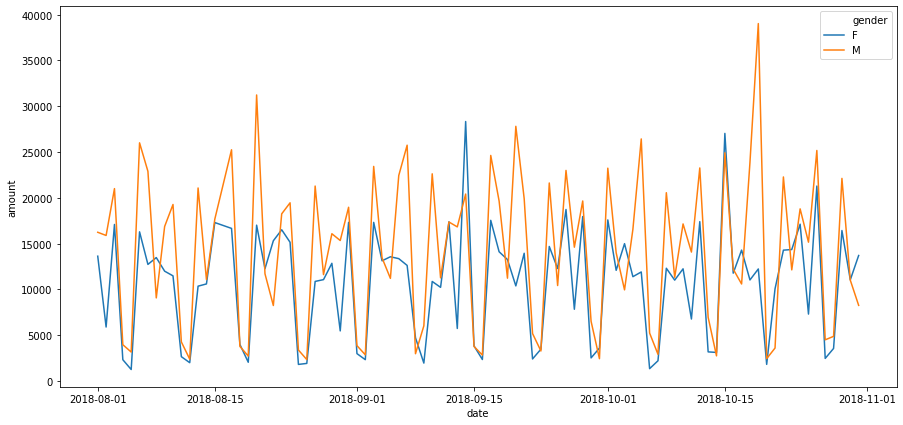

In [17]:
plt.figure(figsize=(15,7))
sns.lineplot(x='date',y='amount',hue='gender',data=gender_vol)

In [18]:
gender_m=gender_tran.groupby(['date','gender'])['amount'].mean().reset_index()

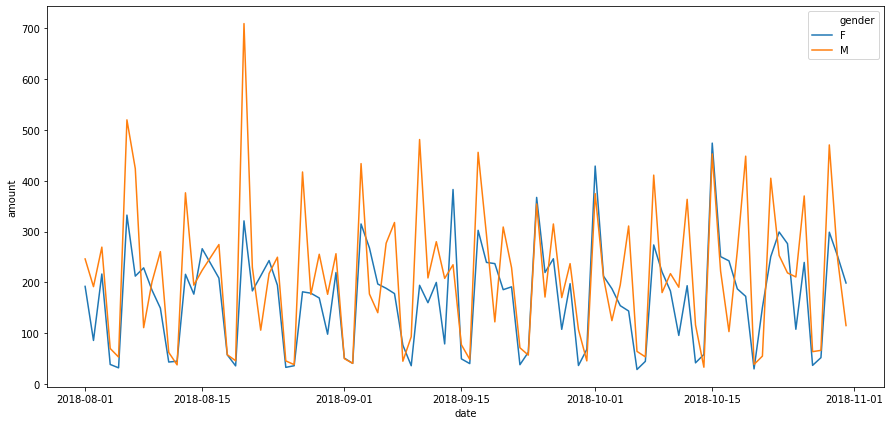

In [19]:
plt.figure(figsize=(15,7))
sns.lineplot(x='date',y='amount',hue='gender',data=gender_m)

In [20]:
# Transaction volume by state
tran_state=df.groupby(['date','merchant_state'])['amount'].sum().reset_index()
tran_state.head()

,date,merchant_state,amount
0,2018-08-01,NSW,828.36
1,2018-08-01,NT,73.25
2,2018-08-01,QLD,921.76
3,2018-08-01,SA,62.37
4,2018-08-01,TAS,17.13


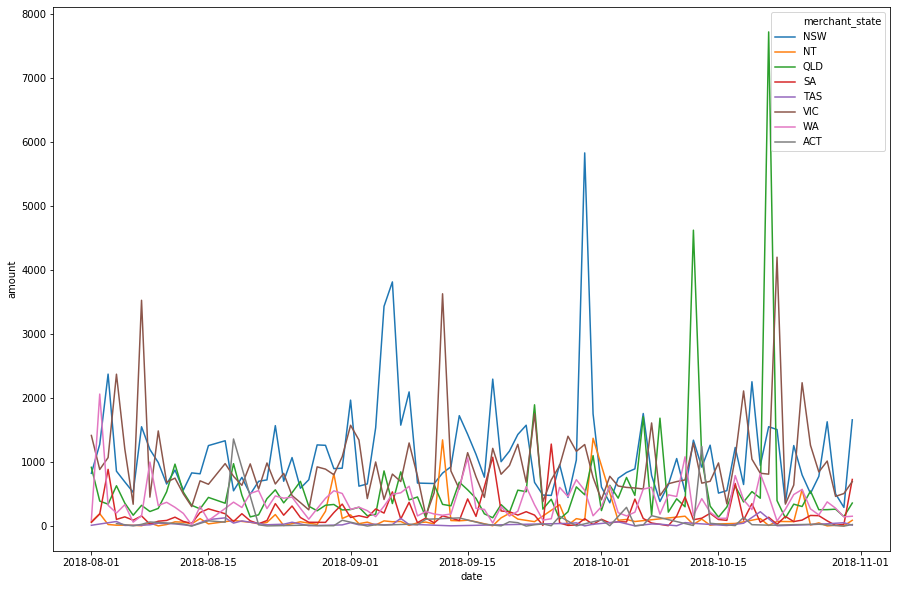

In [21]:
plt.figure(figsize=(15,10))
sns.lineplot(x='date',y='amount',hue='merchant_state',data=tran_state)

In [22]:
tran_state_m=df.groupby(['date','merchant_state'])['amount'].mean().reset_index()

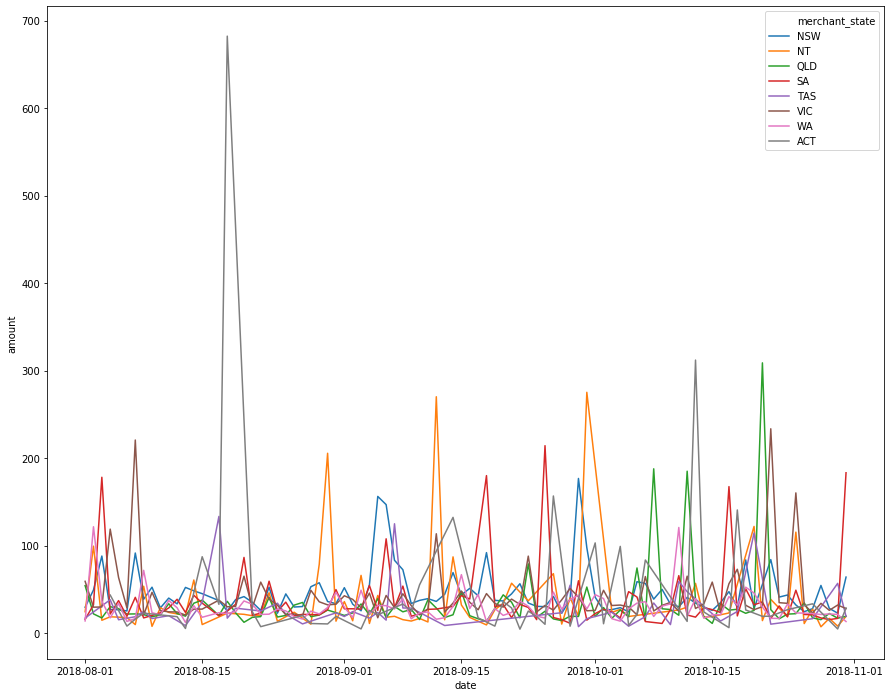

In [23]:
plt.figure(figsize=(15,12))
sns.lineplot(x='date',y='amount',hue='merchant_state',data=tran_state_m)

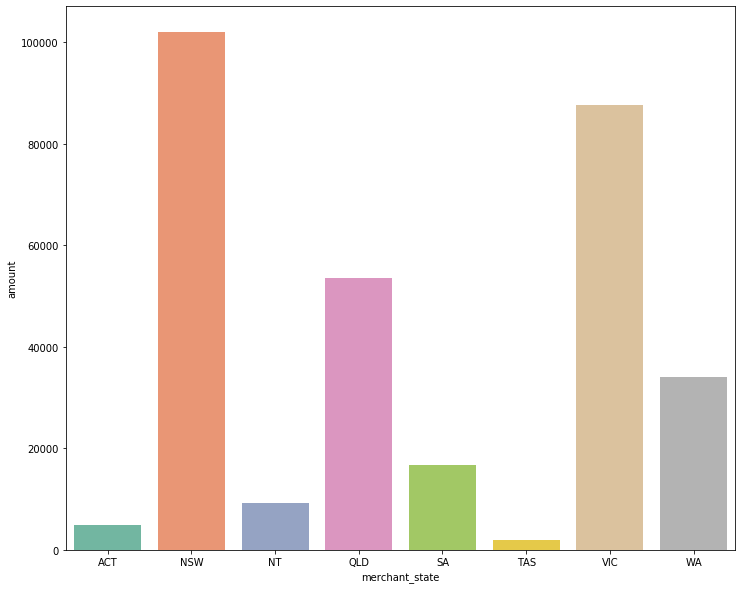

In [24]:
# State Based transaction
tran_state1=df.groupby('merchant_state')['amount'].sum().reset_index()
plt.figure(figsize=(12,10))
sns.barplot(x='merchant_state',y='amount',data=tran_state1,palette='Set2')

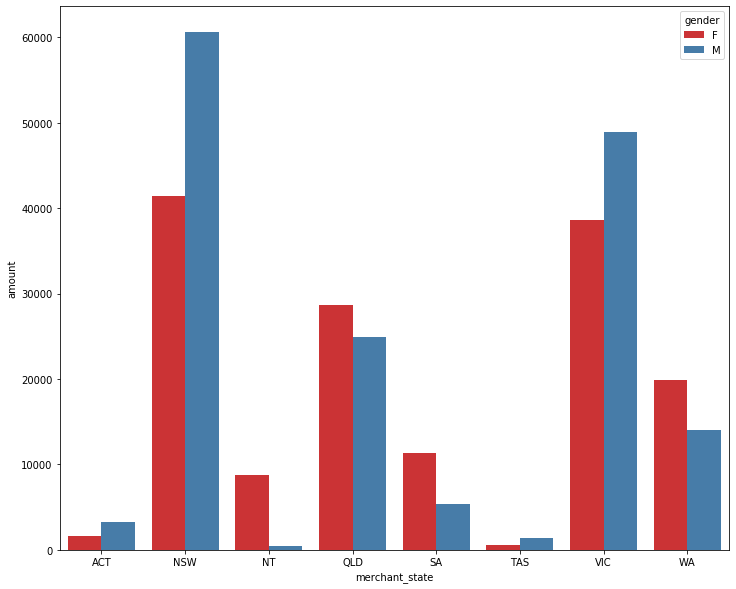

In [25]:
# State Based Transaction By Gender
tran_state2=df.groupby(['merchant_state','gender'])['amount'].sum().reset_index()
plt.figure(figsize=(12,10))
sns.barplot(x='merchant_state',y='amount',hue='gender',data=tran_state2,palette='Set1')

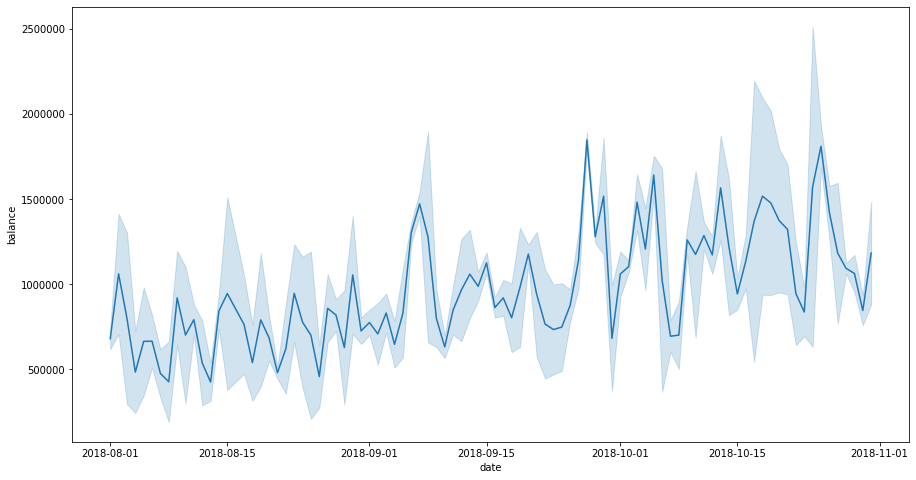

In [26]:
# Analyzing Balance
cust_bal=df.groupby(['date','gender'])['balance'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(x='date',y='balance',data=cust_bal,palette='Set2')

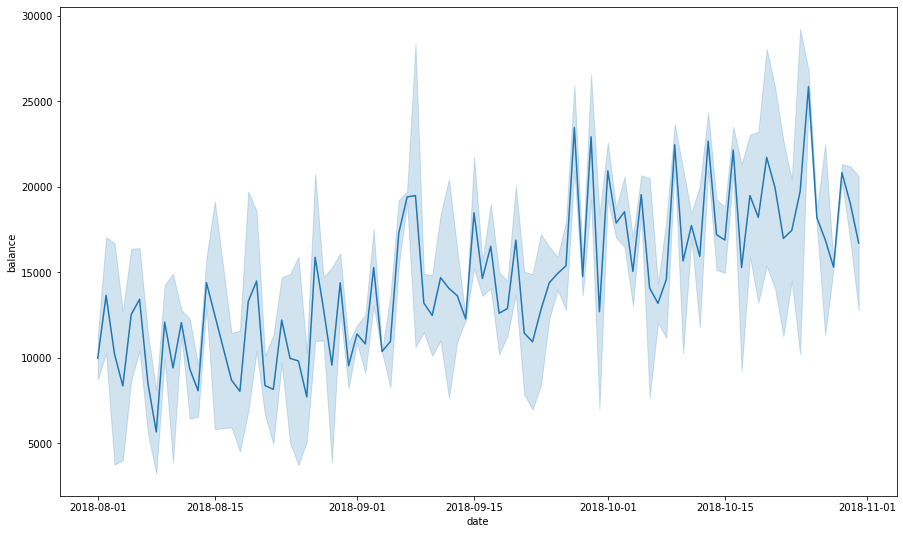

In [27]:
cust_bal1=df.groupby(['date','gender'])['balance'].mean().reset_index()
plt.figure(figsize=(15,9))
sns.lineplot(x='date',y='balance',data=cust_bal1,palette='Set2')

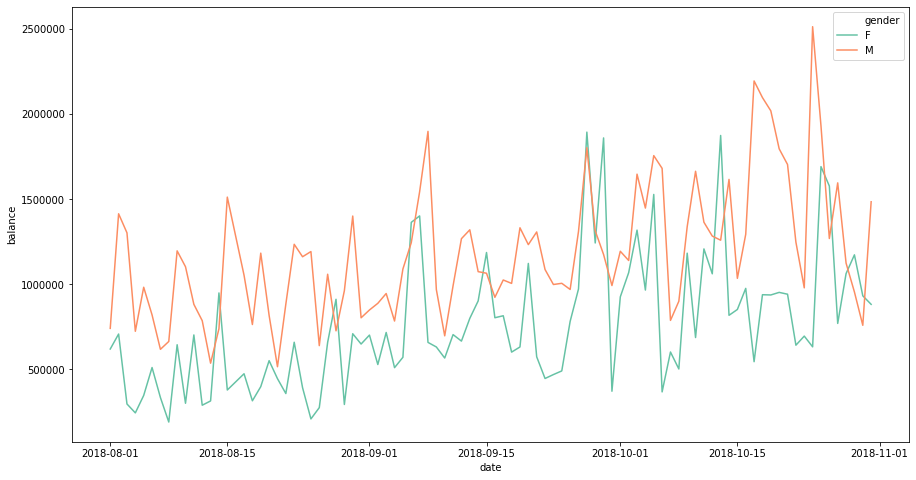

In [28]:
cust_bal2=df.groupby(['date','gender'])['balance'].mean().reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(x='date',y='balance',hue='gender',data=cust_bal,palette='Set2')

In [29]:
#Sum of all transactions sorted by age
age_s= df.groupby(['age',"gender"])["amount"].sum().reset_index()
age_s.head()

,age,gender,amount
0,18,F,45124.14
1,18,M,34020.50
2,19,F,84318.80
3,19,M,61733.92
4,20,F,49579.79


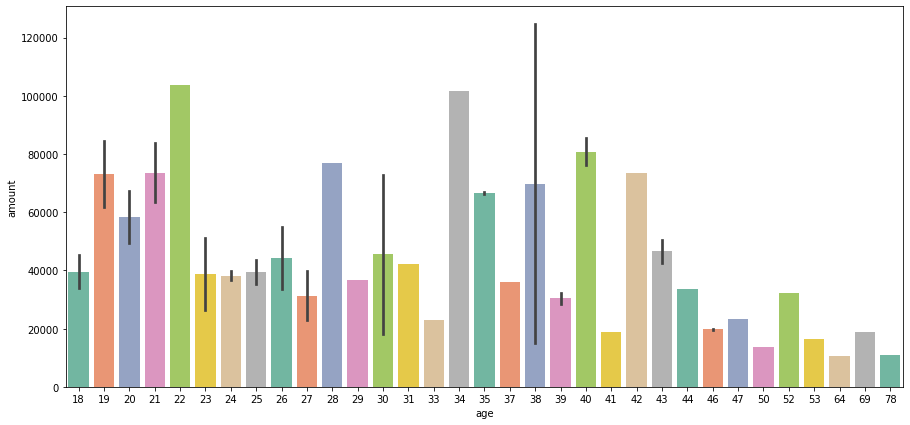

In [30]:
plt.figure(figsize=(15,7))
sns.barplot(x='age',y='amount',data=age_s,palette='Set2')

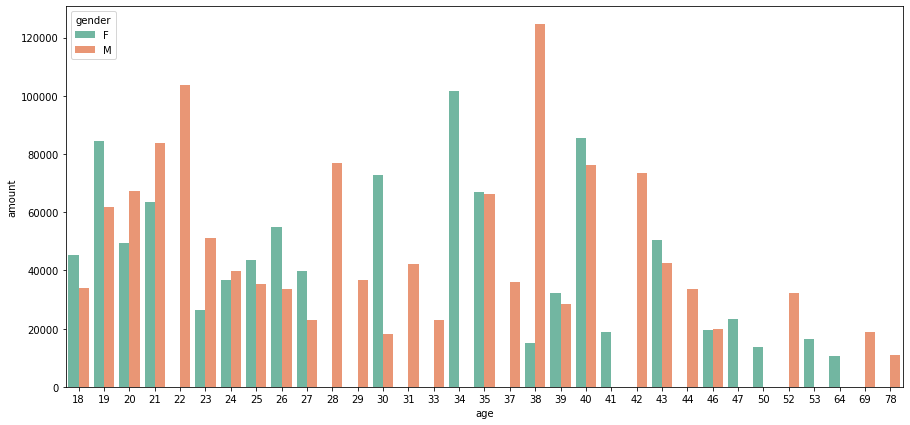

In [31]:
plt.figure(figsize=(15,7))
sns.barplot(x='age',y='amount',hue='gender',data=age_s,palette='Set2')

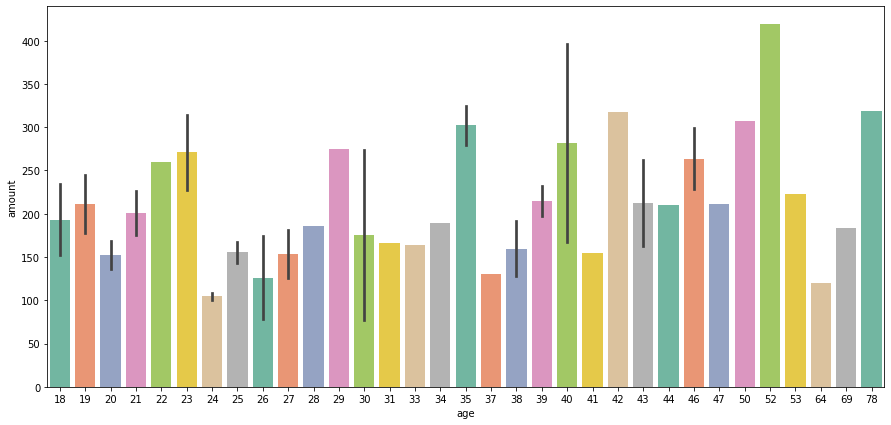

In [32]:
age_m= df.groupby(['age',"gender"])["amount"].mean().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x='age',y='amount',data=age_m,palette='Set2')

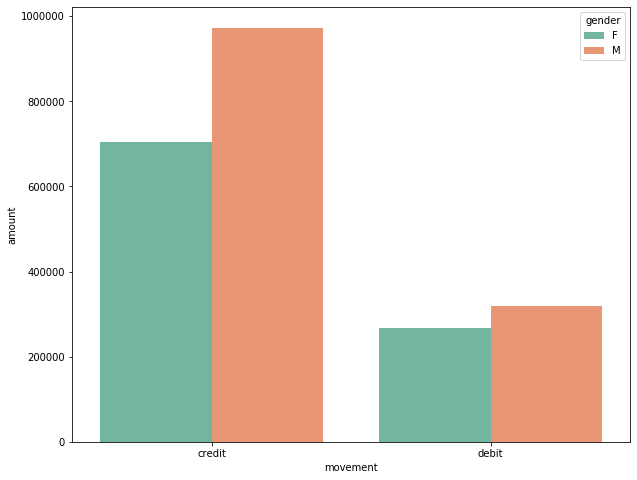

In [33]:
# Transaction either Debit or credit
d_c=df.groupby(['movement','gender'])['amount'].sum().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x='movement',y='amount',hue='gender',data=d_c,palette='Set2')

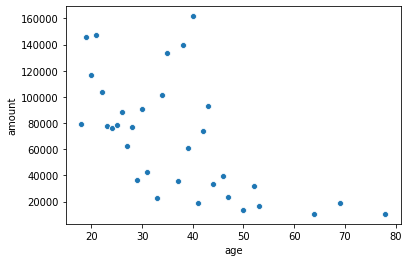

In [34]:
sc_1=df.groupby('age')['amount'].sum().reset_index()
sns.scatterplot(x='age',y='amount',data=sc_1)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [36]:
df_sal = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_sal.head()

,card_present_flag,balance,age,merchant_code,amount
customer_id,,,,,
CUS-1005756958,NaN,4718.665385,53,0.0,970.47
CUS-1117979751,NaN,11957.202857,21,0.0,3578.65
CUS-1140341822,NaN,5841.720000,28,0.0,1916.51
CUS-1147642491,NaN,8813.467692,34,0.0,1711.39
CUS-1196156254,NaN,23845.717143,34,0.0,3903.73


In [37]:
sal=[]
for customer_id in df["customer_id"]:
    sal.append(int(df_sal.loc[customer_id]["amount"]))
    
df["annual_salary"] = sal

In [38]:
df_customer = df.groupby("customer_id").mean()
df_customer.head()

,card_present_flag,balance,age,merchant_code,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,2275.852055,53,0.0,222.862603,970
CUS-1117979751,0.826923,9829.929000,21,0.0,339.843700,3578
CUS-1140341822,0.815385,5699.212250,28,0.0,212.632500,1916
CUS-1147642491,0.750000,9032.841186,34,0.0,245.600169,1711
CUS-1196156254,0.785276,22272.433755,34,0.0,147.145796,3903


In [43]:
df_customer['balance'].corr(df_customer['annual_salary']),df_customer['balance'].corr(df_customer['age'])

(0.20564308404356624, 0.231963096050887)

In [44]:
df_customer['age'].corr(df_customer['annual_salary'])

-0.13522694954964612

In [45]:
#Linear Regression
N_train = int(len(df_customer)*0.7)
X_train = df_customer.drop("annual_salary", axis=1).iloc[:N_train]
Y_train = df_customer["annual_salary"].iloc[:N_train]
X_test = df_customer.drop("annual_salary", axis=1).iloc[N_train:]
Y_test = df_customer["annual_salary"].iloc[N_train:]

In [46]:
lr = LinearRegression()

In [48]:
lr.fit(X_train, Y_train)
lr.score(X_train, Y_train)

0.2468897331961574

In [50]:
lr.predict(X_test)


array([3132.72421023, 2175.39641247, 2098.83496666, 2648.18350248,
       1783.60238994, 2779.34238454, 2709.70361603, 2961.5936652 ,
       2244.52686912, 1665.19124951, 2038.4996552 , 2972.85574737,
       2006.76417873, 1846.04764406, 2291.3211743 , 2156.44498139,
       1879.88463891, 5508.09056187, 1970.1444943 , 2263.4707209 ,
       1764.79270295, 2744.0674848 , 2172.82833702, 3958.85094997,
       2337.95629146, 1839.16986473, 2173.64875609, 1559.47188362,
       1851.43350432, 2570.51455513])

In [52]:
lr.score(X_test, Y_test)

-0.23854072913734248

In [53]:
# Decision Tree
df_cat = df[["txn_description", "gender", "age", "merchant_state", "movement"]]

In [54]:
pd.get_dummies(df_cat).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [60]:
N_train = int(len(df)*0.7)
X_train = pd.get_dummies(df_cat).iloc[:N_train]
Y_train = df["annual_salary"].iloc[:N_train]
X_test = pd.get_dummies(df_cat).iloc[N_train:]
Y_test = df["annual_salary"].iloc[N_train:]

In [61]:
d = DecisionTreeClassifier()

In [62]:
d.fit(X_train, Y_train)
d.score(X_train, Y_train)

0.7909845788849348

In [63]:
d.predict(X_test)

array([2840, 1013,  996, ..., 4054, 1043,  996], dtype=int64)

In [64]:
d.score(X_test, Y_test)

0.7550512039856075